# Testing

This notebook provide some tests for the library.

We first implement the series implementation for reference:

In [1]:
import mpmath as mp
import numpy as np
import cplot
from mittleff import mittleff

def mittleff_series(alpha, beta, z, tol = 1e-5):
    prev = mp.rgamma(beta) # k = 0
    curr = 1.0e15
    k = 1
    res = prev
    while True:
        curr = mp.rgamma(alpha*k + beta) * z**k
        res += curr
        if mp.fabs(curr - prev) <= tol:
            break
        prev = curr        
        k = k + 1
    return np.complex128(res)

## Percentage of sucessfull computations

`TODO` Whats the proper measure for error in this case?

In [48]:
%%time
L, npoints = 5, 100
succ, fail, tot = 0, 0, 0
alpha, beta = 1, 1
failed_cases = []
for x in np.linspace(-L, L, npoints):
    for y in np.linspace(-L, L, npoints):
        z = x + y*1j
        correct_result = mittleff_series(alpha, beta, z, tol = 1e-5)
        computed_result = mittleff(alpha, beta, z, tol = 1e-5)
        err = np.abs(correct_result - computed_result)**2
        if err > 1:
            #print(f"{correct_result:+.8e}, {computed_result:+.8e}, {err:.2e}%")
            failed_cases.append((alpha, beta, z))
            fail += 1
        else:
            succ += 1
        tot += 1
print(f"Success: {succ*100/tot}%, Fail (err > 1%):{fail*100/tot}%")

Success: 100.0%, Fail (err > 1%):0.0%
CPU times: user 2min 29s, sys: 205 ms, total: 2min 29s
Wall time: 2min 29s


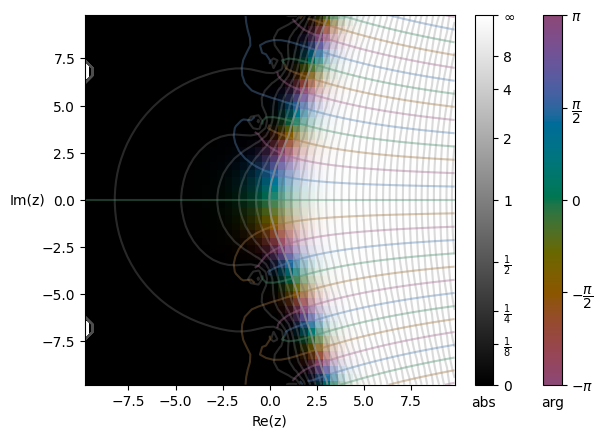

CPU times: user 1min 43s, sys: 752 ms, total: 1min 44s
Wall time: 1min 43s


In [2]:
%%time
cplot.plot(
    np.vectorize(lambda z: np.complex128(mittleff(0.8, 1, z))),
    (-10.0, +10.0, 50),
    (-10.0, +10.0, 50)).show()

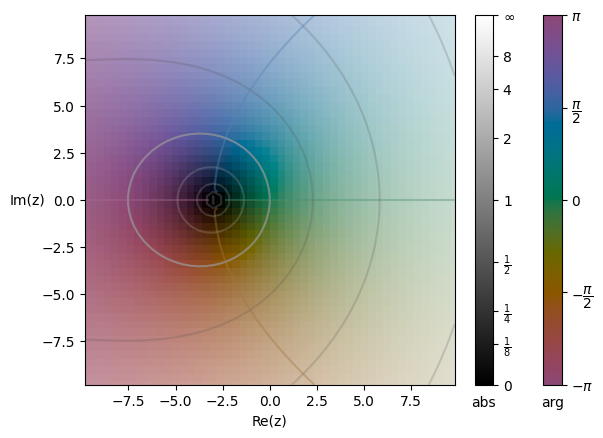

CPU times: user 10min 27s, sys: 1 s, total: 10min 28s
Wall time: 10min 28s


In [3]:
%%time
cplot.plot(
    np.vectorize(lambda z: np.complex128(mittleff(2.25, 1, z))),
    (-10.0, +10.0, 50),
    (-10.0, +10.0, 50)).show()

## Figures from dissertation

/home/vct/.pyenv/versions/3.9.18/envs/mittag-leffler/lib/python3.9/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: overflow encountered in <lambda> (vectorized)
  outputs = ufunc(*inputs)
/home/vct/.pyenv/versions/3.9.18/envs/mittag-leffler/lib/python3.9/site-packages/cplot/_main.py:289: RuntimeWarning: invalid value encountered in divide
  return r**alpha / (r**alpha + 1)
/home/vct/.pyenv/versions/3.9.18/envs/mittag-leffler/lib/python3.9/site-packages/matplotx/_contour.py:174: RuntimeWarning: invalid value encountered in subtract
  horiz &= np.abs(Z[:-1, :] - Z[1:, :]) > min_jump
/home/vct/.pyenv/versions/3.9.18/envs/mittag-leffler/lib/python3.9/site-packages/matplotx/_contour.py:175: RuntimeWarning: invalid value encountered in subtract
  verti &= np.abs(Z[:, :-1] - Z[:, 1:]) > min_jump
/home/vct/.pyenv/versions/3.9.18/envs/mittag-leffler/lib/python3.9/site-packages/matplotx/_contour.py:303: RuntimeWarning: invalid value encountered in divide
  y_[is_vertical] = (y[j] 

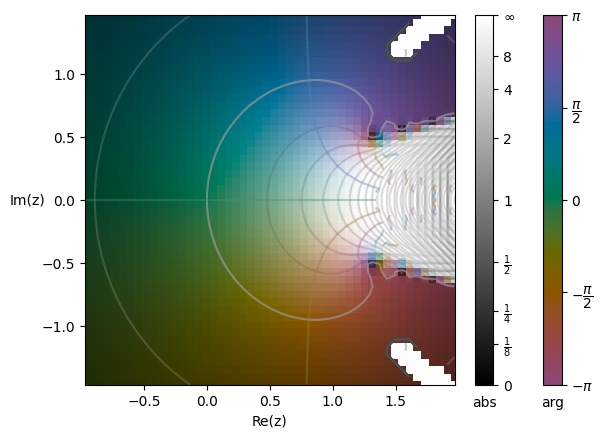

CPU times: user 2min 24s, sys: 777 ms, total: 2min 25s
Wall time: 2min 24s


In [4]:
%%time
cplot.plot(
    np.vectorize(lambda z: np.complex128(mittleff(0.2, 1, z))),
    (-1.0, +2.0, 50),
    (-1.5, +1.5, 50)).show()

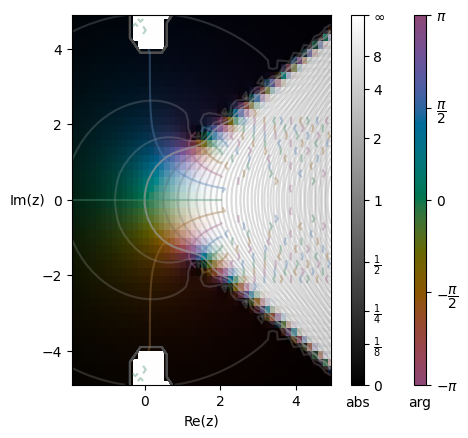

CPU times: user 1min 28s, sys: 685 ms, total: 1min 29s
Wall time: 1min 28s


In [5]:
%%time
cplot.plot(
    np.vectorize(lambda z: np.complex128(mittleff(0.4613, 1, z))),
    (-2.0, +5.0, 50),
    (-5, +5, 50)).show()

## Particular cases

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mittleff.cmplxreg import *
from mittleff import compute_secondary_params

In [ ]:
def create_test(alpha, beta, z):
    return f"    assert(np.isclose(mittleff({alpha}, {beta}, {z}), {mittleff(alpha,beta,z)}))\n".replace("I", "1j")

with open("test_misc.py", "w") as fp:
    fp.write("import numpy as np\n")
    fp.write("from mittleff import mittleff\n\n")
    fp.write("def test_mittleff():\n")
    for params in [(0.5, 0.5, 0.5), 
                   (1.5, 0.5, 0.5),
                   (0.6, 0.8, 7.0),
                   (2.3, 1.0, 0.7 + 2.0*I),
                   (2.3, 1.0, 0.7 + 0.2*I)]:
        fp.write(create_test(*params))